<a href="https://colab.research.google.com/github/Tasnimtk/pythonProject/blob/main/Python_%26_aRt_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#Importing the csv file from the repository, Tasnimtk/pythonProject
url = 'https://raw.githubusercontent.com/Tasnimtk/pythonProject/master/merged_pages.csv'
df = pd.read_csv(url, index_col=0, sep = ';', error_bad_lines=False)

In [ ]:
#We can have a look on the dataset, we see that the page number is indexed
df

,id,title,main_reference_number,has_not_been_viewed_much,date_start,date_end,date_display,artist_display,place_of_origin,exhibition_history,colorfulness,department_title,artist_title,style_title,classification_title
page,,,,,,,,,,,,,,,
1,10550,The Dance,1932.52,False,1745.0,1755.0,c. 1750,"Pietro Longhi\nItalian, 1702–1785",Italy,NaN,19.3809,Painting and Sculpture of Europe,Pietro Longhi,NaN,oil on canvas
1,9614,Haunted House,1931.707,False,1930.0,1930.0,1930,"Morris Kantor\nAmerican, born Russia (now Bela...",United States,"Art Institute of Chicago, Forty–Fourth Annual ...",29.5410,Arts of the Americas,Morris Kantor,Surrealism,oil on canvas
1,16571,"Arrival of the Normandy Train, Gare Saint-Lazare",1933.1158,False,1877.0,1877.0,1877,"Claude Monet\nFrench, 1840-1926",France,"Paris, 6, rue Le Peletier, 3e exposition de pe...",13.9542,Painting and Sculpture of Europe,Claude Monet,Impressionism,painting
1,11312,Woman Mending,1959.636,False,1895.0,1895.0,1895,"Camille Pissarro\nFrench, 1830-1903",France,"Copenhagen, Valdemar Kleis, Katalog over Marts...",17.9159,Painting and Sculpture of Europe,Camille Pissarro,Post-Impressionism,oil on canvas
1,21727,Thanksgiving,1935.313,False,1935.0,1935.0,c. 1935,"Doris Lee\nAmerican, 1905–1983",United States,"Washington, DC, Corcoran Gallery of Art, Fourt...",30.1231,Arts of the Americas,Doris Lee,Modernism,painting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,56043,Head,1979.271,False,1947.0,1947.0,July 1947,"Henri Matisse\nFrench, 1869-1954",France,NaN,6.9264,Prints and Drawings,Henri Matisse,NaN,pen and ink drawings
15,55406,"Dancer Reclining, from Ten Dancers",1946.313,False,1927.0,1927.0,1927,"Henri Matisse\nFrench, 1869-1954",France,NaN,6.9242,Prints and Drawings,Henri Matisse,NaN,lithograph
15,54720,Persian Woman,1946.36,False,1929.0,1929.0,1929,"Henri Matisse\nFrench, 1869-1954",France,NaN,7.7897,Prints and Drawings,Henri Matisse,NaN,lithograph


In [ ]:
#We reset the index in order to set the default python index
df = df.reset_index()

In [ ]:
#We drop id and page as they are useless to keep.
df = df.drop(columns=['id','page'])

In [ ]:
#check that the changes have been made.
df

,title,main_reference_number,has_not_been_viewed_much,date_start,date_end,date_display,artist_display,place_of_origin,exhibition_history,colorfulness,department_title,artist_title,style_title,classification_title
0,The Dance,1932.52,False,1745.0,1755.0,c. 1750,"Pietro Longhi\nItalian, 1702–1785",Italy,NaN,19.3809,Painting and Sculpture of Europe,Pietro Longhi,NaN,oil on canvas
1,Haunted House,1931.707,False,1930.0,1930.0,1930,"Morris Kantor\nAmerican, born Russia (now Bela...",United States,"Art Institute of Chicago, Forty–Fourth Annual ...",29.5410,Arts of the Americas,Morris Kantor,Surrealism,oil on canvas
2,"Arrival of the Normandy Train, Gare Saint-Lazare",1933.1158,False,1877.0,1877.0,1877,"Claude Monet\nFrench, 1840-1926",France,"Paris, 6, rue Le Peletier, 3e exposition de pe...",13.9542,Painting and Sculpture of Europe,Claude Monet,Impressionism,painting
3,Woman Mending,1959.636,False,1895.0,1895.0,1895,"Camille Pissarro\nFrench, 1830-1903",France,"Copenhagen, Valdemar Kleis, Katalog over Marts...",17.9159,Painting and Sculpture of Europe,Camille Pissarro,Post-Impressionism,oil on canvas
4,Thanksgiving,1935.313,False,1935.0,1935.0,c. 1935,"Doris Lee\nAmerican, 1905–1983",United States,"Washington, DC, Corcoran Gallery of Art, Fourt...",30.1231,Arts of the Americas,Doris Lee,Modernism,painting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Head,1979.271,False,1947.0,1947.0,July 1947,"Henri Matisse\nFrench, 1869-1954",France,NaN,6.9264,Prints and Drawings,Henri Matisse,NaN,pen and ink drawings
1496,"Dancer Reclining, from Ten Dancers",1946.313,False,1927.0,1927.0,1927,"Henri Matisse\nFrench, 1869-1954",France,NaN,6.9242,Prints and Drawings,Henri Matisse,NaN,lithograph
1497,Persian Woman,1946.36,False,1929.0,1929.0,1929,"Henri Matisse\nFrench, 1869-1954",France,NaN,7.7897,Prints and Drawings,Henri Matisse,NaN,lithograph
1498,Reclining Figure,1946.35,True,1929.0,1929.0,1929,"Henri Matisse\nFrench, 1869-1954",France,NaN,5.6427,Prints and Drawings,Henri Matisse,NaN,lithograph


In [ ]:
#to check for the columns names
df.columns

Index(['title', 'main_reference_number', 'has_not_been_viewed_much',
       'date_start', 'date_end', 'date_display', 'artist_display',
       'place_of_origin', 'exhibition_history', 'colorfulness',
       'department_title', 'artist_title', 'style_title',
       'classification_title'],
      dtype='object')

In [ ]:
#'has_not_been_viewed_much' is a confusing name, therefore, we change it to "NOT_been_viewed_much"
df = df.rename(columns={'has_not_been_viewed_much': 'NOT_been_viewed_much'})

In [ ]:
#Check for null values.
#We find that many null values in "exhibition_history" and "style_title", however, we aren't going to remove them as it 
#will majorly reduce our dataset
df.isnull().sum()

title                      0
main_reference_number      0
NOT_been_viewed_much       0
date_start                 1
date_end                   1
date_display               0
artist_display             0
place_of_origin            9
exhibition_history       938
colorfulness              37
department_title           1
artist_title               9
style_title              976
classification_title       7
dtype: int64

In [ ]:
#We remove null values  for all columns except for "exhibition_history" and "style_title"
df = df.dropna(subset=['date_start', 'classification_title', 'artist_title','place_of_origin','department_title','colorfulness']) 
df.isnull().sum()

title                      0
main_reference_number      0
NOT_been_viewed_much       0
date_start                 0
date_end                   0
date_display               0
artist_display             0
place_of_origin            0
exhibition_history       888
colorfulness               0
department_title           0
artist_title               0
style_title              929
classification_title       0
dtype: int64

In [ ]:
#Check the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1438 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1438 non-null   object 
 1   main_reference_number  1438 non-null   object 
 2   NOT_been_viewed_much   1438 non-null   bool   
 3   date_start             1438 non-null   float64
 4   date_end               1438 non-null   float64
 5   date_display           1438 non-null   object 
 6   artist_display         1438 non-null   object 
 7   place_of_origin        1438 non-null   object 
 8   exhibition_history     550 non-null    object 
 9   colorfulness           1438 non-null   float64
 10  department_title       1438 non-null   object 
 11  artist_title           1438 non-null   object 
 12  style_title            509 non-null    object 
 13  classification_title   1438 non-null   object 
dtypes: bool(1), float64(3), object(10)
memory usage: 158.7+ 

In [ ]:
#We convert the years (date_start, date_end) to int type
df['date_end'] = df['date_end'].astype(int)
df['date_start'] = df['date_start'].astype(int)

In [ ]:
#Adding a column "duration" which indicates how many years an artist took to output an X artwork
df['duration'] = df['date_end'] - df['date_start']

In [ ]:
df.shape
#we are kept with 1438 observations. 

(1438, 15)

In [ ]:
#We see how many paintings were completed each year. 
#The maximum number of completed paintings in our dataset was in 1894
df.date_end.value_counts()

1894       64
1947       43
1936       41
1899       37
1932       37
           ..
1768        1
1775        1
1785        1
1786        1
5000001     1
Name: date_end, Length: 212, dtype: int64

In [ ]:
#The column "exhibition_history" displays where and when the exhibitions took place, we would like to add another column
#that tells us how many times an X painting was displayed in an exhibition, we find that between each exhibition information
# "\n\n" seperator exists, this could be a way to count for the number exhibitions. Note that we need to add +1 as
#we would like to account for the first exhibition. 
df['exhibition_number'] = df.exhibition_history.str.count('\n\n') + 1

### Data Visualization

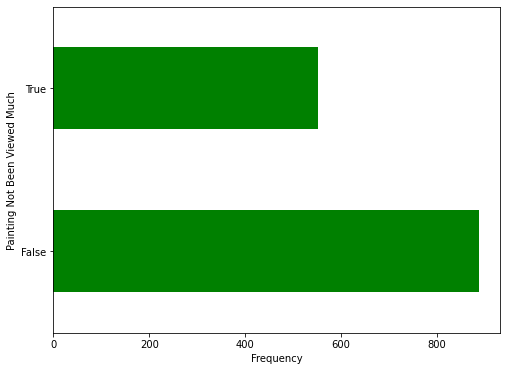

In [ ]:
import matplotlib.pyplot as plt
#We would like to visualize the frequency of "NOT_been_viewed_much" 
#most of the painting have been viewed in the website of Art Institute of Chicago
df['NOT_been_viewed_much'].value_counts().plot(kind='barh', color='green', figsize=(8,6))
plt.xlabel('Frequency')
plt.ylabel('Painting Not Been Viewed Much')
plt.show()

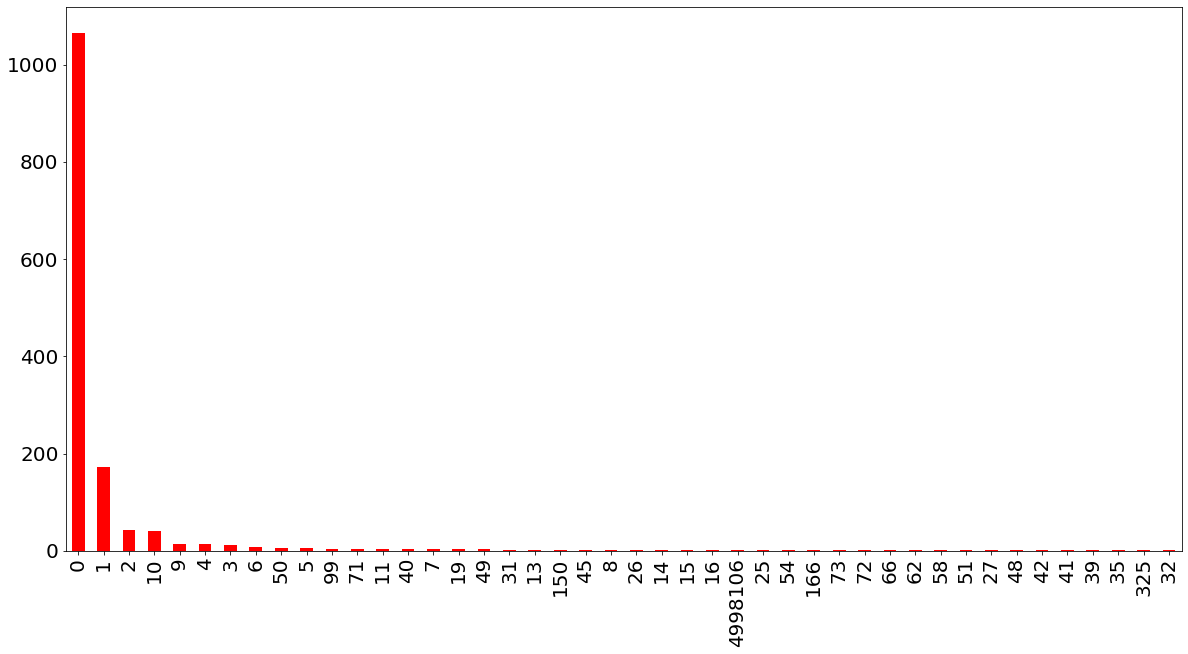

In [ ]:
#We would like to visualize the duration it took to complete an artwork and their frequency
import matplotlib.pyplot as plt

df['duration'].value_counts().plot(kind='bar', color='red', figsize=(20,10), fontsize = 20)
#we need to remove some values as it doesnt make sense for an artist to stay more than 80 years working on an artwork.

In [ ]:
#exclude observations that the artwork duration exceed 80 years.
df = df[df.duration <= 80]

Text(0, 0.5, 'Frequency')

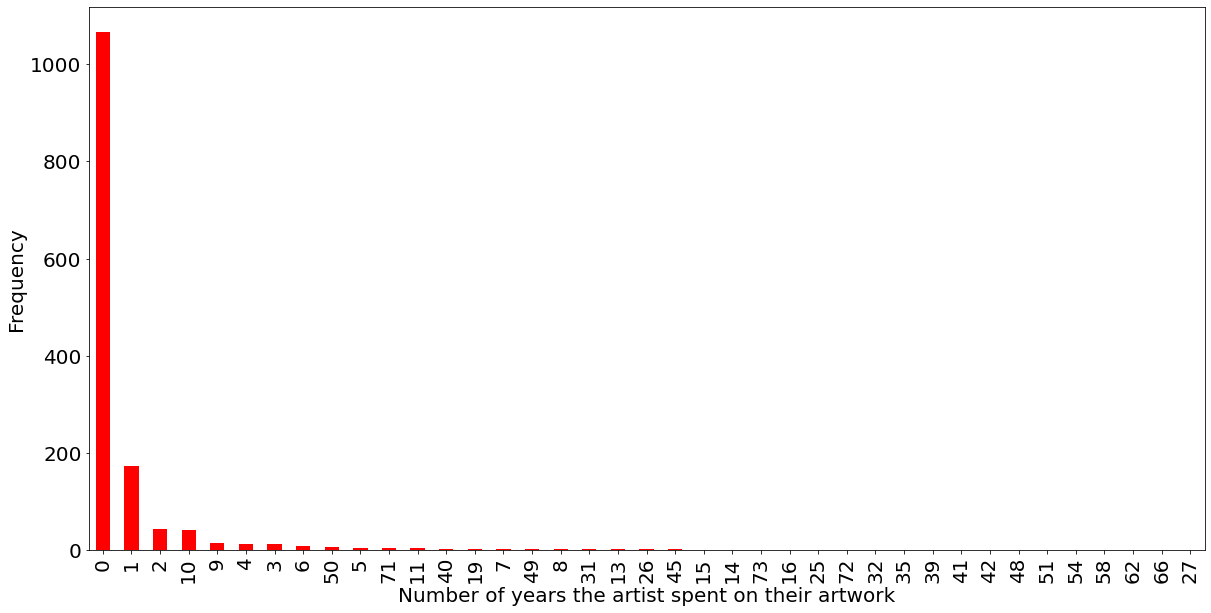

In [ ]:
import matplotlib.pyplot as plt
df['duration'].value_counts().plot(kind='bar', color='red', figsize=(20,10), fontsize = 20)
plt.xlabel('Number of years the artist spent on their artwork', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
#We observe that more than 1000 artwork were done in less than a year. 

In [ ]:
#Earlier we have added "exhibition_number" column in order to know the number of exhibition an X artwork been displayed. 
#Now, we would like to visualize "exhibition_number" VS. "NOT_been_viewed_much".
#Since we have a wide range in exhibition_number, therefore, we are going to create bins to better visualize.
#Binning
df['exhibitiongroup'] = pd.cut(df.exhibition_number,[0,5,10,15,20,25,30,35,40,45,50,55], labels = ['0-5', '5-10', '10-15',
                                                                                                 
                                                                '15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55'])

In [ ]:
#We find out that 883 painting were viewed a lot on the website "Art Institute of Chicago" ,
#and 546 do not have much popularity (on the website). 
pd.DataFrame(df.NOT_been_viewed_much.value_counts())

,NOT_been_viewed_much
False,883
True,546


In [ ]:
#Count of binned exhibition number
pd.DataFrame(df.exhibitiongroup.value_counts())

,exhibitiongroup
0-5,366
5-10,90
10-15,46
15-20,27
20-25,13
25-30,3
50-55,1
35-40,1
45-50,0
40-45,0


In [ ]:
#We group by view
byview = df.groupby('NOT_been_viewed_much').exhibitiongroup.value_counts()
byview

NOT_been_viewed_much  exhibitiongroup
False                 0-5                211
                      5-10                86
                      10-15               45
                      15-20               27
                      20-25               13
                      25-30                3
                      35-40                1
                      50-55                1
True                  0-5                155
                      5-10                 4
                      10-15                1
Name: exhibitiongroup, dtype: int64

In [ ]:
#We set the byview as an index
byview.index

MultiIndex([(False,   '0-5'),
            (False,  '5-10'),
            (False, '10-15'),
            (False, '15-20'),
            (False, '20-25'),
            (False, '25-30'),
            (False, '35-40'),
            (False, '50-55'),
            ( True,   '0-5'),
            ( True,  '5-10'),
            ( True, '10-15')],
           names=['NOT_been_viewed_much', 'exhibitiongroup'])

In [ ]:
byview.unstack()

exhibitiongroup,0-5,5-10,10-15,15-20,20-25,25-30,35-40,50-55
NOT_been_viewed_much,,,,,,,,
False,211.0,86.0,45.0,27.0,13.0,3.0,1.0,1.0
True,155.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN


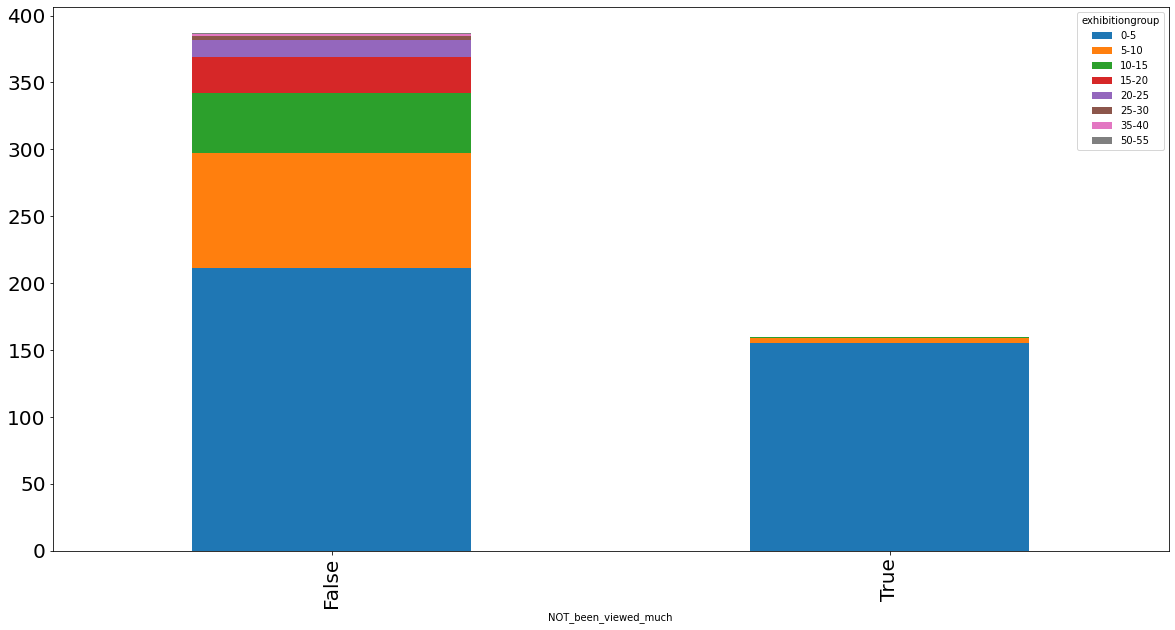

In [ ]:
byview.unstack().plot(kind='bar',stacked = True, figsize = (20,10), fontsize = 20)
#We observe that most of the paintings that haven't been viewed much on the website haven't been displayed in exhibitions 
#(0-5) & (5-10) and slighlty (10-15)
#Whereas those who have been viewed a lot have the share of all bins (exhibitiongroup)

In [ ]:
#Here we have a closer look on "place_of_origin" of the artists
df['place_of_origin'].value_counts()

France                  576
Spain                   416
United States           346
Italy                    29
American                 12
Netherlands               6
Abiquiu                   3
Morocco                   3
Flanders                  2
Paris                     2
New York                  2
Ireland                   2
London                    2
Vallauris                 2
Jersey                    2
Germany                   2
New York City             2
Belgium                   2
Frascati                  1
Villalcázar de Sirga      1
Mozambique                1
England                   1
Switzerland               1
Egypt                     1
Saint Louis               1
New Mexico                1
Corona                    1
Russia                    1
Venice                    1
Providence                1
Mali                      1
Colombia                  1
Lake George               1
Loch Vale                 1
Chicago                   1
Wichita             

In [ ]:
#We notice that the list includes city names and the country names, we standardize and make this column represent one type of category. 
#Thus, we replace city names with their respective countries so that we end up with a list of country names.
df['place_of_origin']=df['place_of_origin'].str.replace("American","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Chicago","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Jersey","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("New York City","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("New York","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Wichita","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Saint Louis","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Providence","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Corona","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Loch Vale","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Lake George","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("Abiquiu","United States")
df['place_of_origin']=df['place_of_origin'].str.replace("New Mexico","United States")

df['place_of_origin']=df['place_of_origin'].str.replace("London","England")


df['place_of_origin']=df['place_of_origin'].str.replace("Flanders","Belgium")

df['place_of_origin']=df['place_of_origin'].str.replace("Corfu","Greece")
df['place_of_origin']=df['place_of_origin'].str.replace("Venice","Italy")
df['place_of_origin']=df['place_of_origin'].str.replace("Sicily","Italy")
df['place_of_origin']=df['place_of_origin'].str.replace("Frascati","Italy")

df['place_of_origin']=df['place_of_origin'].str.replace("Paris","France")
df['place_of_origin']=df['place_of_origin'].str.replace("Vallauris","France")

df['place_of_origin']=df['place_of_origin'].str.replace("Petén","Guatemala")

df['place_of_origin']=df['place_of_origin'].str.replace("Villalcázar de Sirga","Spain")

In [ ]:
df.place_of_origin.value_counts()

France           580
Spain            417
United States    375
Italy             31
Netherlands        6
Belgium            4
Morocco            3
England            3
Germany            2
Ireland            2
Russia             1
Colombia           1
Mali               1
Egypt              1
Switzerland        1
Mozambique         1
Name: place_of_origin, dtype: int64

In [ ]:
#We create another column called continent (a copy of "place_of_origin")
df['continent'] = df['place_of_origin']

In [ ]:
df['continent'] = df['continent'].replace(['England','France','Italy','Spain','Belgium'
                                                 ,'Ireland','Germany','Netherlands','Switzerland'],'Europe')
df['continent'] = df['continent'].replace(['United States'],'North America')
df['continent'] = df['continent'].replace(['Egypt','Morocco','Mali','Mozambique'],'Africa')
df['continent'] = df['continent'].replace(['Colombia'],'South America')
df['continent'] = df['continent'].replace(['Russia'],'Asia')

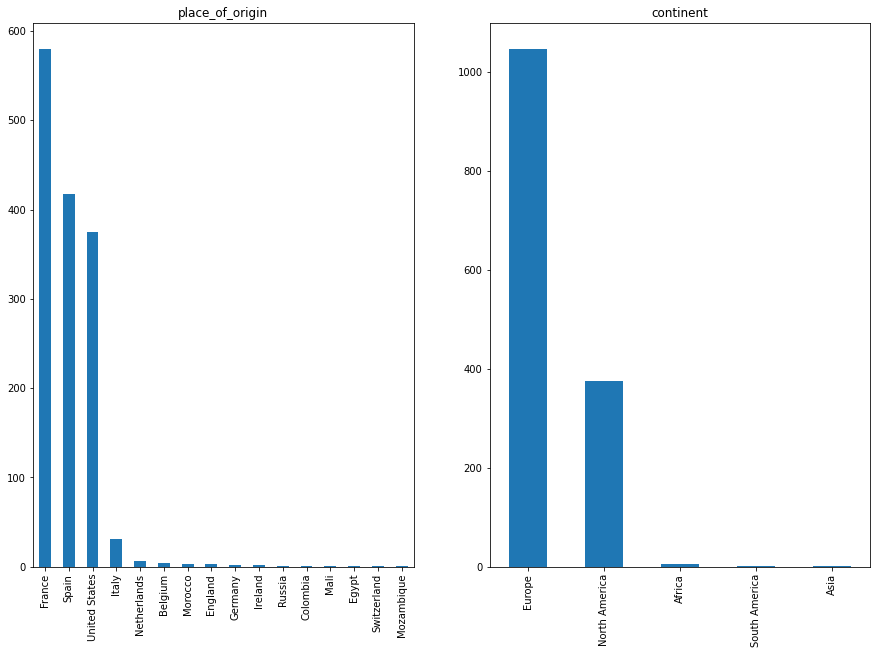

In [ ]:
#We create a for loop for visualize the bar plots for continents and place of origin 
categorical_features = ["place_of_origin", "continent"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], figsize=(15,10)).set_title(categorical_feature)
fig.show()

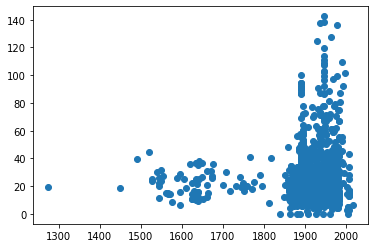

In [ ]:
#We create a scatter plot in order to see the colorfulness over the centuries. 
plt.scatter(df.date_start, df.colorfulness)

In [ ]:
#As we have observed earlier, the observations are stacked and we can't pull an interpertation. So we are creating 5 subsets 
#and in each we select a period of time. in df1 we include 400 years as we can see above there is only 1 obs. in 13th century
#and 1 in the 15th century, so we include the observation in 1500 and 1600 
#then we subset for each century. 
df1 = df[(df.date_start >= 1200) & (df.date_start <= 1600)]
df2 = df[(df.date_start >= 1601) & (df.date_start <= 1700)]
df3 = df[(df.date_start >= 1701) & (df.date_start <= 1800)]
df4 = df[(df.date_start >= 1801) & (df.date_start <= 1900)]
df5 = df[(df.date_start >= 1901) & (df.date_start <= 2020)]

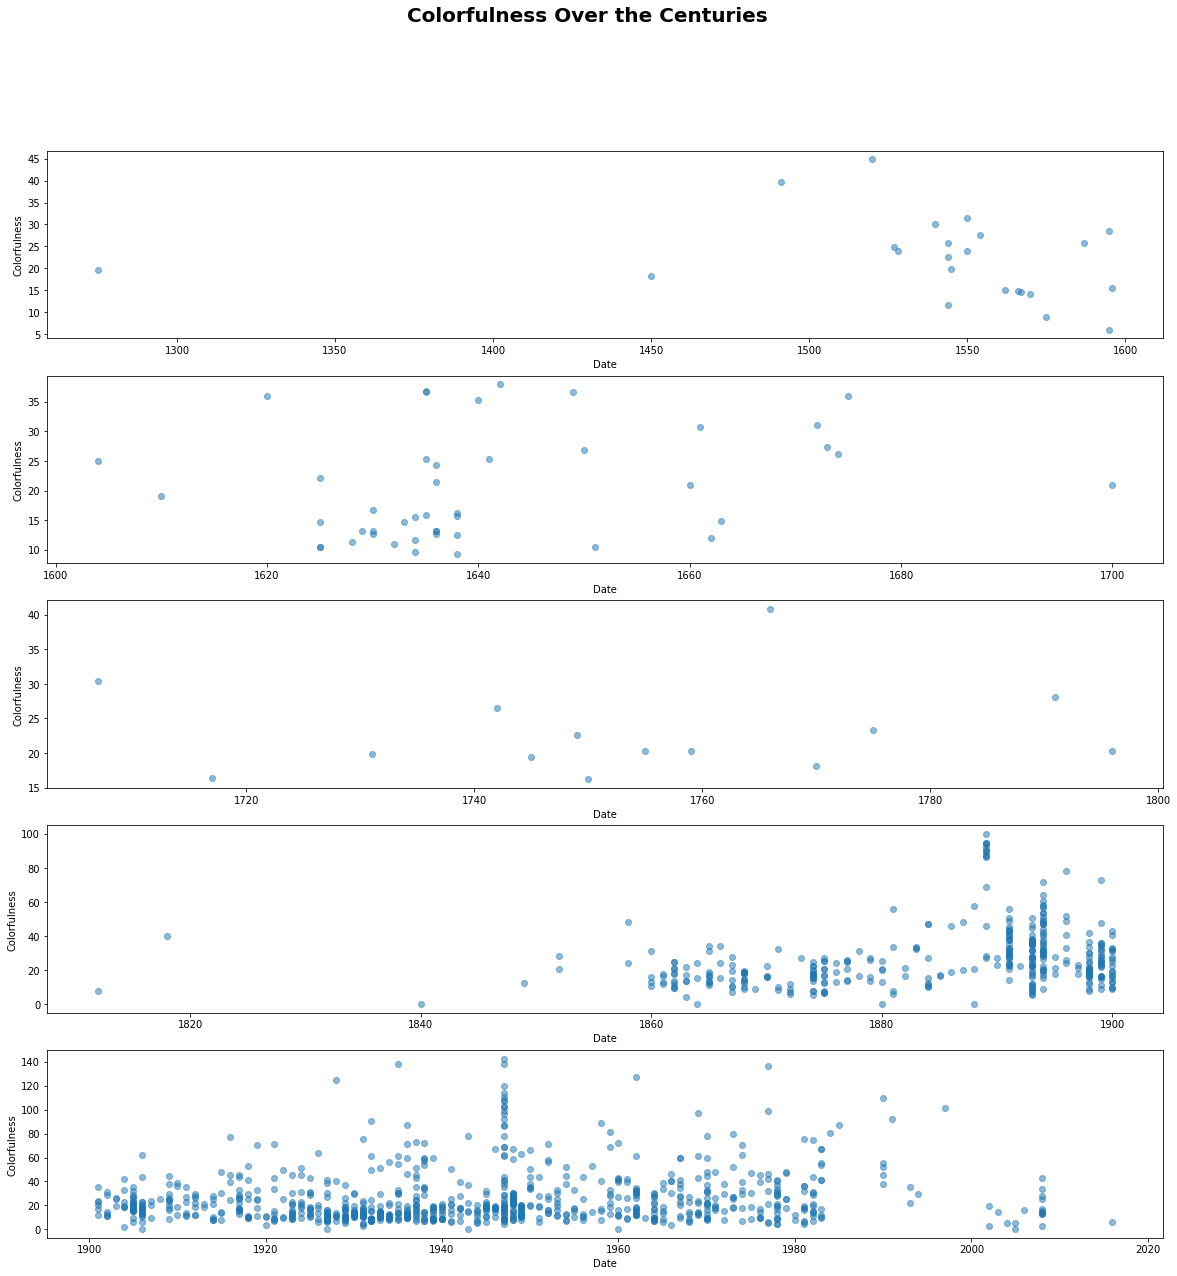

In [ ]:
#Here we visualize each subset in sub-scattter-plots
fig, ax = plt.subplots(5, figsize=(20, 20))
ax[0].scatter(x = df1.date_start, y = df1.colorfulness, alpha=0.5)
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Colorfulness")

plt.suptitle('Colorfulness Over the Centuries', weight = 'bold', fontsize=20)

ax[1].scatter(x = df2.date_start, y = df2.colorfulness, alpha=0.5)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Colorfulness")

ax[2].scatter(x = df3.date_start, y = df3.colorfulness, alpha = 0.5)
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Colorfulness")


ax[3].scatter(x = df4.date_start, y = df4.colorfulness, alpha = 0.5)
ax[3].set_xlabel("Date")
ax[3].set_ylabel("Colorfulness")

ax[4].scatter(x = df5.date_start, y = df5.colorfulness, alpha = 0.5)
ax[4].set_xlabel("Date")
ax[4].set_ylabel("Colorfulness")


plt.show()

In [ ]:
# We observe the colorfulness of paintings in the first 3 subsets from [1200 - 1800] haven't exceeded 45, which indicate
#that artworks were not very vibrant.
#Most of the artworks existent in our dataset are made from 1850 - 1980 and their colorfulness mostly range from 0 - 50,
# also indicating not very vibrant in color artworks, however, we can see for instance between 1940 and 1950  a big rise in
#colorful paintings

In [ ]:
#As our datasets includes many textual information, we are using wordcloud as visualization tool.

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=c580351361daeda61c76e73deeeeb612685b2b196a766473c7893e35eecba590
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from stop_words import get_stop_words

In [ ]:
#We remove stop words 
stop_words = list(get_stop_words('en'))
def remove_stopwords(text):
    text = " ".join([w for w in text if not w in stop_words])
    return text

In [ ]:
# remove stopwords from the text
df['classification_title'] = [remove_stopwords(r.split()) for r in df['classification_title']]

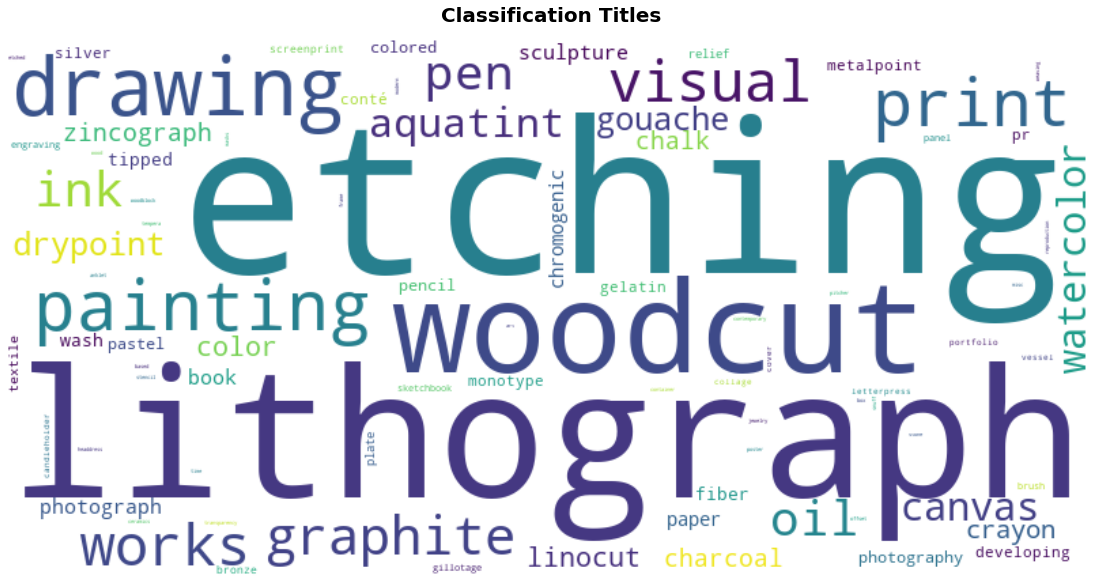

In [ ]:
#We create our first wordcloud to see the the magnitude of the classification title in our dataset.
# Join the text.
long_string = ','.join(list(df.classification_title.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, collocations=False,contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
plt.figure(figsize= (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Classification Titles", pad = 14, weight = 'bold', fontsize=20)

plt.show()


In [ ]:
#We notice that most of the paintings (in our dataset) happen to be under the classification of 
#etching and lithograph the most, the bigger the word the more weight it has in the dataset.

In [ ]:
#Earlier we have found that "style_title" have the most nas 
df.isna().sum()

title                      0
main_reference_number      0
NOT_been_viewed_much       0
date_start                 0
date_end                   0
date_display               0
artist_display             0
place_of_origin            0
exhibition_history       882
colorfulness               0
department_title           0
artist_title               0
style_title              924
classification_title       0
duration                   0
exhibition_number        882
exhibitiongroup          882
continent                  0
dtype: int64

In [ ]:
#Therefore we create a seperate dataframe in order to remove the nas and visualize the style_title 
style = df
style = style.dropna(subset=['style_title']) 

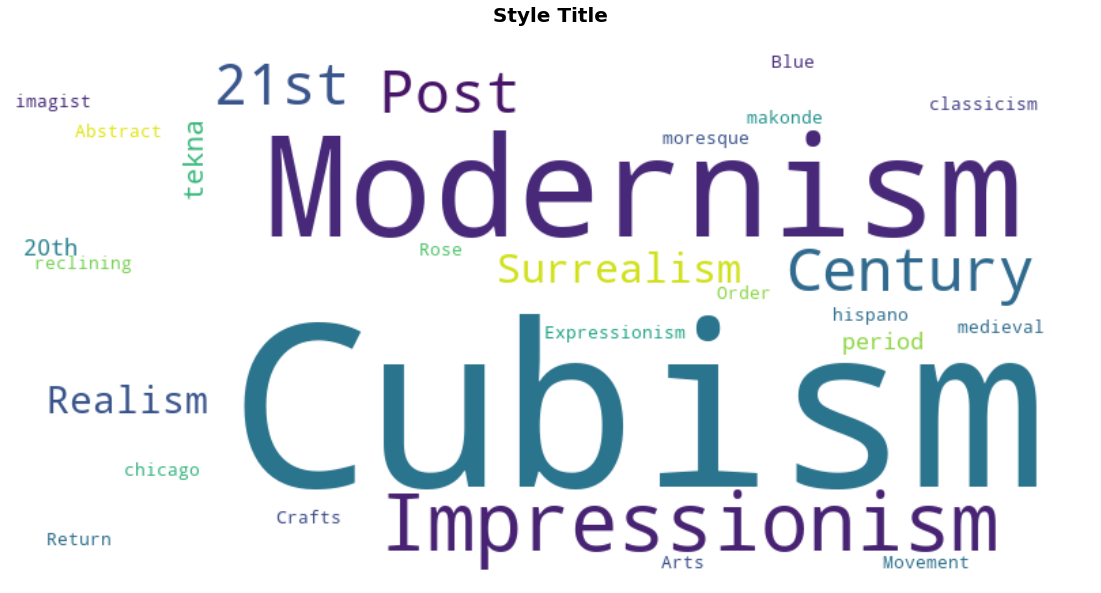

In [ ]:
# Join the words
long_string = ','.join(list(style.style_title.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, collocations=False,contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string)
plt.figure(figsize= (20,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Style Title", pad = 20, weight = 'bold', fontsize=20)

plt.show()


In [ ]:
#We see that most of the paintings are under the style of cubsim, and that makes sense because most of our observations
#are between 19th and 20th century; where they used cubism, modernism, impressionism and surrealism most. 